<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-and-data" data-toc-modified-id="Import-Libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries and data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Selecting-Best-model" data-toc-modified-id="Selecting-Best-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Selecting Best model</a></span></li><li><span><a href="#Finalizing-and-Saving-Model" data-toc-modified-id="Finalizing-and-Saving-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finalizing and Saving Model</a></span></li></ul></div>

## Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
# For visualization
from IPython.display import display, HTML

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## Exploratory Data Analysis

In [3]:
train.shape

(4250, 20)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
# Check columns list and missing values
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
train.describe(include =['object'])

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


In [8]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
corrMatrix = train.corr()
corrMatrix.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
account_length,1.00,-0.01,-0.00,0.02,-0.00,-0.01,0.01,-0.01,-0.01,-0.00,-0.01,0.00,0.01,0.00,0.00
number_vmail_messages,-0.01,1.00,0.00,-0.01,0.00,0.01,0.00,0.01,0.02,0.00,0.02,0.01,0.01,0.01,-0.02
total_day_minutes,-0.00,0.00,1.00,0.00,1.00,-0.01,0.01,-0.01,0.01,-0.00,0.01,-0.02,0.00,-0.02,-0.00
total_day_calls,0.02,-0.01,0.00,1.00,0.00,0.01,0.00,0.01,0.00,-0.00,0.00,0.01,0.01,0.01,-0.02
total_day_charge,-0.00,0.00,1.00,0.00,1.00,-0.01,0.01,-0.01,0.01,-0.00,0.01,-0.02,0.00,-0.02,-0.00
total_eve_minutes,-0.01,0.01,-0.01,0.01,-0.01,1.00,0.00,1.00,-0.01,0.01,-0.01,-0.00,0.01,-0.00,-0.01
total_eve_calls,0.01,0.00,0.01,0.00,0.01,0.00,1.00,0.00,0.01,-0.01,0.01,-0.01,0.00,-0.01,0.01
total_eve_charge,-0.01,0.01,-0.01,0.01,-0.01,1.00,0.00,1.00,-0.01,0.01,-0.01,-0.00,0.01,-0.00,-0.01
total_night_minutes,-0.01,0.02,0.01,0.00,0.01,-0.01,0.01,-0.01,1.00,0.02,1.00,-0.00,-0.02,-0.00,-0.01
total_night_calls,-0.00,0.00,-0.00,-0.00,-0.00,0.01,-0.01,0.01,0.02,1.00,0.02,0.00,0.00,0.00,-0.01


In [10]:
# Select upper triangle of correlation matrix
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['total_day_charge',
 'total_eve_charge',
 'total_night_charge',
 'total_intl_charge']

In [11]:
# Drop highly correlated features 
train.drop(to_drop, axis=1, inplace=True)

In [12]:
corr_cat = train.select_dtypes(include=['object']).apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_cat.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,state,area_code,international_plan,voice_mail_plan,churn
state,1.00,-0.01,0.03,-0.00,-0.01
area_code,-0.01,1.00,0.02,0.01,0.02
international_plan,0.03,0.02,1.00,-0.00,0.26
voice_mail_plan,-0.00,0.01,-0.00,1.00,0.11
churn,-0.01,0.02,0.26,0.11,1.00


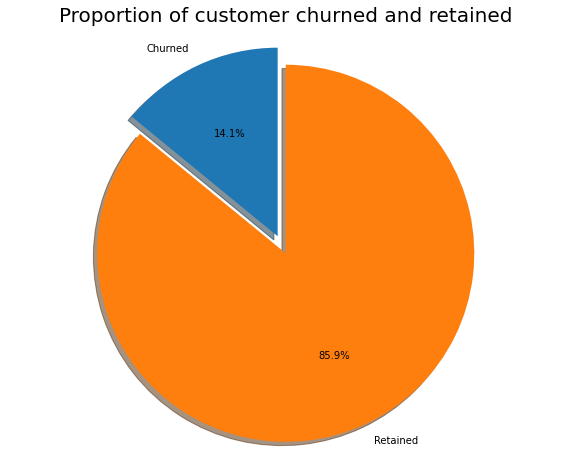

In [13]:
labels = 'Churned', 'Retained'
sizes = [train.churn[train['churn']=='yes'].count(), train.churn[train['churn']=='no'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [14]:
for col in train.select_dtypes(include=['object']):
    print("\n","#"*15, "descriptive statistics for :",col,"#"*15)
    display(train.groupby([col,"churn"]).agg({col : "count"}))


 ############### descriptive statistics for : state ###############


state
state churn       
AK    no        57
      yes        4
AL    no        88
      yes       13
AR    no        60
      yes       11
AZ    no        70
      yes        7
CA    no        29
      yes       10
CO    no        71
      yes        9
CT    no        73
      yes       15
DC    no        64
      yes        8
DE    no        67
      yes       13
FL    no        67
      yes        9
GA    no        57
      yes        7
HI    no        73
      yes        4
IA    no        55
      yes        7
ID    no        94
      yes       12
IL    no        73
      yes        6
IN    no        70
      yes       13
KS    no        72
      yes       15
KY    no        73
      yes       12
LA    no        62
      yes        7
MA    no        75
      yes       14
MD    no        67
      yes       19
ME    no        73
      yes       16
MI    no        72
      yes       15
MN    no        89
      yes       19
MO    no        70
      yes       10
MS    no        67
      yes       15
MT    no        63
      yes       17
NC    no        73
      yes        7
ND    no        61
      yes        6
NE    no        68
      yes        5
NH    no        68
      yes       10
NJ    no        70
      yes       26
NM    no        68
      yes       10
NV    no        66
      yes       17
NY    no        80
      yes       16
OH    no        83
      yes       12
OK    no        62
      yes       16
OR    no        84
      yes       15
PA    no        59
      yes        8
RI    no        81
      yes        6
SC    no        58
      yes       14
SD    no        64
      yes       11
TN    no        67
      yes       12
TX    no        79
      yes       19
UT    no        85
      yes       12
VA    no        95
      yes        5
VT    no        76
      yes       10
WA    no        62
      yes       18
WI    no        87
      yes        7
WV    no       120
      yes       19
WY    no        85
      yes       10


 ############### descriptive statistics for : area_code ###############


area_code
area_code     churn           
area_code_408 no           934
              yes          152
area_code_415 no          1821
              yes          287
area_code_510 no           897
              yes          159


 ############### descriptive statistics for : international_plan ###############


international_plan
international_plan churn                    
no                 no                   3423
                   yes                   431
yes                no                    229
                   yes                   167


 ############### descriptive statistics for : voice_mail_plan ###############


voice_mail_plan
voice_mail_plan churn                 
no              no                2622
                yes                516
yes             no                1030
                yes                 82


 ############### descriptive statistics for : churn ###############


,,churn
churn,churn,
no,no,3652
yes,yes,598


<AxesSubplot:xlabel='voice_mail_plan', ylabel='count'>

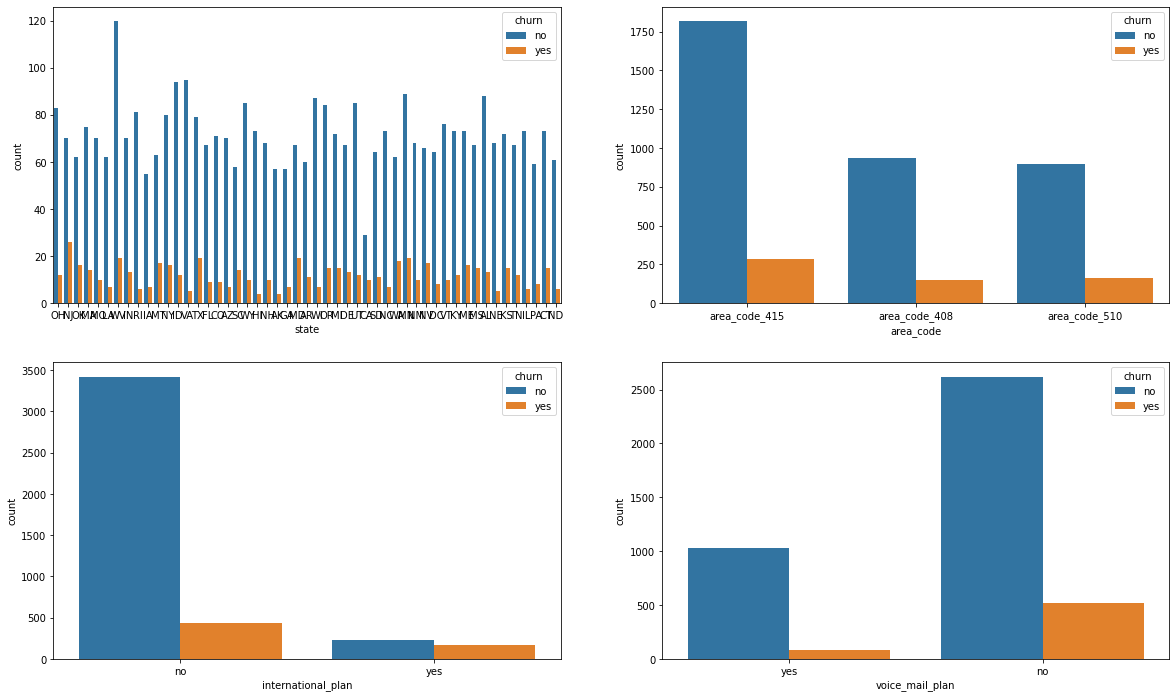

In [15]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='state', hue = 'churn',data = train, ax=axarr[0][0])
    sns.countplot(x='area_code', hue = 'churn',data = train, ax=axarr[0][1])
    sns.countplot(x='international_plan', hue = 'churn',data = train, ax=axarr[1][0])
    sns.countplot(x='voice_mail_plan', hue = 'churn',data = train, ax=axarr[1][1])

In [16]:
for col in train.select_dtypes(exclude=['object']):
    print("\n","#"*15, "descriptive statistics for :",col,"#"*15)
    display(train.groupby(["churn"])[col].describe())


 ############### descriptive statistics for : account_length ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,99.924973,39.748743,1.0,73.0,99.0,127.0,243.0
yes,598.0,102.137124,39.369162,2.0,76.0,101.0,125.0,225.0



 ############### descriptive statistics for : number_vmail_messages ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,8.177437,13.706304,0.0,0.0,0.0,20.0,52.0
yes,598.0,4.299331,11.124649,0.0,0.0,0.0,0.0,48.0



 ############### descriptive statistics for : total_day_minutes ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,175.555093,49.549782,0.0,142.500,178.25,210.700,313.8
yes,598.0,208.990134,69.183493,0.0,151.175,220.55,266.975,351.5



 ############### descriptive statistics for : total_day_calls ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,99.813801,19.659616,0.0,87.0,100.0,113.0,160.0
yes,598.0,100.478261,20.988919,0.0,87.0,101.0,114.0,165.0



 ############### descriptive statistics for : total_eve_minutes ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,198.570674,49.897726,0.0,164.575,199.2,231.725,359.3
yes,598.0,209.964883,51.312321,70.9,172.150,210.2,248.100,349.4



 ############### descriptive statistics for : total_eve_calls ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,100.231380,19.936117,0.0,87.0,100.0,114.0,170.0
yes,598.0,99.841137,19.752909,48.0,87.0,99.5,113.0,168.0



 ############### descriptive statistics for : total_night_minutes ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,199.577519,50.521152,0.0,165.975,199.3,233.125,395.0
yes,598.0,206.331773,48.959820,47.4,172.825,206.1,241.250,381.6



 ############### descriptive statistics for : total_night_calls ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,99.942771,20.066126,0.0,87.0,100.0,113.0,175.0
yes,598.0,99.209030,20.263378,42.0,84.0,99.0,114.0,158.0



 ############### descriptive statistics for : total_intl_minutes ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,10.194441,2.749911,0.0,8.5,10.3,12.0,19.7
yes,598.0,10.632441,2.794494,0.0,8.8,10.6,12.7,20.0



 ############### descriptive statistics for : total_intl_calls ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,4.460570,2.433859,0.0,3.0,4.0,6.0,19.0
yes,598.0,4.217391,2.626925,0.0,2.0,4.0,5.0,20.0



 ############### descriptive statistics for : number_customer_service_calls ###############


,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
no,3652.0,1.441676,1.165159,0.0,1.0,1.0,2.0,8.0
yes,598.0,2.275920,1.827334,0.0,1.0,2.0,4.0,9.0


<AxesSubplot:xlabel='churn', ylabel='number_customer_service_calls'>

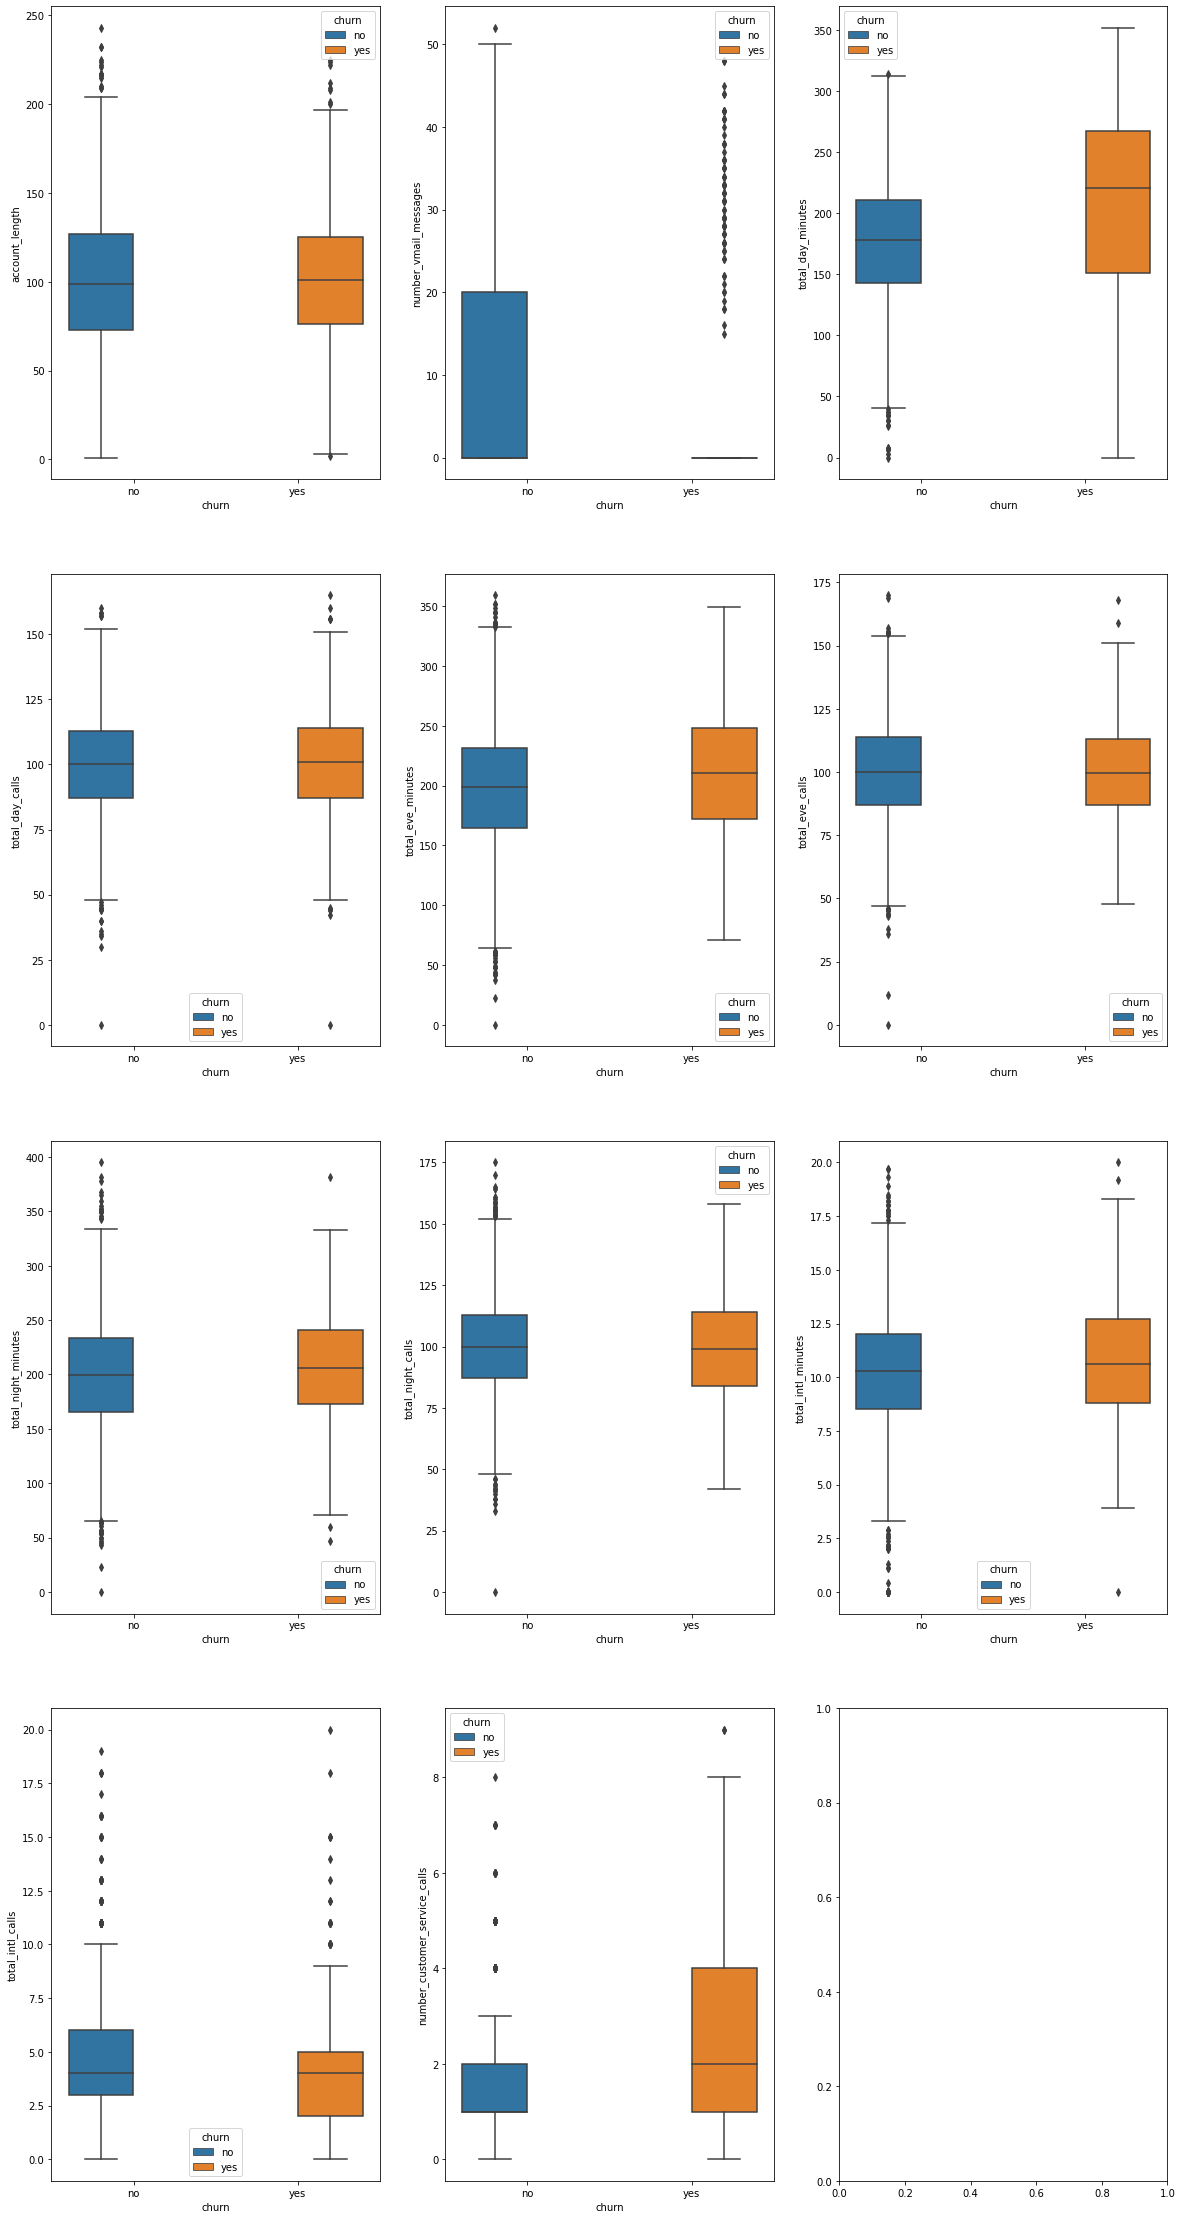

In [17]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(4, 3, figsize=(20, 40))
sns.boxplot(y='account_length',x = 'churn', hue = 'churn',data = train, ax=axarr[0][0])
sns.boxplot(y='number_vmail_messages',x = 'churn', hue = 'churn',data = train , ax=axarr[0][1])
sns.boxplot(y='total_day_minutes',x = 'churn', hue = 'churn',data = train, ax=axarr[0][2])
sns.boxplot(y='total_day_calls',x = 'churn', hue = 'churn',data = train, ax=axarr[1][0])
sns.boxplot(y='total_eve_minutes',x = 'churn', hue = 'churn',data = train, ax=axarr[1][1])
sns.boxplot(y='total_eve_calls',x = 'churn', hue = 'churn',data = train, ax=axarr[1][2])
sns.boxplot(y='total_night_minutes',x = 'churn', hue = 'churn',data = train, ax=axarr[2][0])
sns.boxplot(y='total_night_calls',x = 'churn', hue = 'churn',data = train, ax=axarr[2][1])
sns.boxplot(y='total_intl_minutes',x = 'churn', hue = 'churn',data = train, ax=axarr[2][2])
sns.boxplot(y='total_intl_calls',x = 'churn', hue = 'churn',data = train, ax=axarr[3][0])
sns.boxplot(y='number_customer_service_calls',x = 'churn', hue = 'churn',data = train, ax=axarr[3][1])

## Model Training

In [20]:
from pycaret.classification import *
setting_up = setup(data = train, target = 'churn',
                   fix_imbalance = True,
                   remove_outliers = True,
                   ignore_low_variance = True,
                   normalize = True,
                   train_size = 0.9,
                   log_experiment = True, 
                   experiment_name = 'churn_smote'
                  )

Setup Succesfully Completed!


,Description,Value
0,session_id,2605
1,Target Type,Binary
2,Label Encoded,"no: 0, yes: 1"
3,Original Data,"(4250, 16)"
4,Missing Values,False
5,Numeric Features,10
6,Categorical Features,5
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [21]:
setting_up[0].describe()

,account_length,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,state_AK,...,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,number_customer_service_calls_0,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_3,number_customer_service_calls_4,number_customer_service_calls_5
count,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,...,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000
mean,-0.004086,0.004927,0.002000,0.001741,-0.001934,-0.000416,0.009578,0.002041,-0.010479,0.013129,...,0.916027,0.083973,0.741392,0.258608,0.214516,0.370572,0.231608,0.135992,0.045331,0.001982
std,0.999394,0.997838,0.992835,1.001818,0.996554,0.996621,0.996035,0.998268,0.972746,0.113839,...,0.277382,0.277382,0.437924,0.437924,0.410537,0.483018,0.421912,0.342823,0.208054,0.044477
min,-2.500048,-3.337769,-5.033498,-3.984067,-5.032413,-3.522071,-3.326863,-3.716268,-1.797300,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.686160,-0.676954,-0.650291,-0.676184,-0.661926,-0.659969,-0.688847,-0.636309,-0.579164,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.031144,0.008155,0.004671,0.014451,-0.008865,-0.000554,0.007987,0.052153,-0.173119,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.674257,0.672895,0.659633,0.669261,0.694432,0.674751,0.704822,0.631910,0.638972,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.596633,3.170765,3.027572,3.167091,3.507619,3.862588,3.741029,3.421990,5.511516,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
models = compare_models(n_select = 3,fold =5, round =2, exclude = [ 'qda', 'gpc'] , turbo = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.96,0.90,0.75,0.87,0.80,0.78,0.78,0.79
1,Light Gradient Boosting Machine,0.96,0.90,0.76,0.88,0.81,0.79,0.79,0.24
2,CatBoost Classifier,0.96,0.90,0.76,0.87,0.81,0.79,0.79,6.07
3,Gradient Boosting Classifier,0.94,0.90,0.76,0.73,0.74,0.71,0.71,1.45
4,Random Forest Classifier,0.92,0.88,0.50,0.77,0.61,0.56,0.58,0.12
5,Decision Tree Classifier,0.91,0.83,0.73,0.60,0.66,0.60,0.61,0.07
6,MLP Classifier,0.91,0.87,0.58,0.62,0.60,0.55,0.55,4.78
7,Extra Trees Classifier,0.91,0.88,0.44,0.73,0.54,0.50,0.52,0.26
8,Ada Boost Classifier,0.88,0.84,0.60,0.49,0.54,0.47,0.47,0.42
9,SVM - Radial Kernel,0.87,0.87,0.80,0.47,0.59,0.52,0.55,6.51


In [23]:
models

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logistic', random_state=2605, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=0),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=2605, reg_alpha=0.0, reg

In [24]:
model = [tune_model(i,fold =5, round =2, optimize = 'F1' ) for i in models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.94,0.88,0.73,0.74,0.73,0.69,0.69
1,0.94,0.87,0.68,0.79,0.73,0.70,0.70
2,0.96,0.91,0.82,0.88,0.85,0.83,0.83
3,0.96,0.93,0.82,0.84,0.83,0.80,0.80
4,0.96,0.94,0.80,0.89,0.84,0.82,0.82
Mean,0.95,0.91,0.77,0.82,0.79,0.77,0.77
SD,0.01,0.03,0.05,0.06,0.05,0.06,0.06


In [25]:
model

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.25, max_delta_step=0, max_depth=40,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=800, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logistic', random_state=2605, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=0),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=70,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
                n_estimators=150, n_jobs=-1, num_leaves=40, objective=None,
                random_state=2605, reg_alpha=0.3, reg_lambda=

In [26]:
ada = create_model('ada')
ensemble = stack_models(model,fold =5, round =2, meta_model = ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.94,0.87,0.69,0.75,0.72,0.69,0.69
1,0.96,0.88,0.72,0.91,0.80,0.78,0.79
2,0.97,0.92,0.81,0.90,0.85,0.83,0.83
3,0.95,0.92,0.79,0.80,0.80,0.77,0.77
4,0.96,0.90,0.80,0.88,0.83,0.81,0.81
Mean,0.95,0.90,0.76,0.85,0.80,0.78,0.78
SD,0.01,0.02,0.05,0.06,0.04,0.05,0.05


## Selecting Best model

In [27]:
best = automl(optimize = 'F1')

In [28]:
best

###### Optimizing threshold

In [29]:
optimize_threshold(best, true_negative = 1500, false_negative = -5000)

Optimized Probability Threshold: 0.5 | Optimized Cost Function: 502500


In [32]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9851,0.9938,0.8776,1.0,0.9348,0.9264,0.929


In [30]:
pred_holdout = predict_model(best,probability_threshold=0.5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9851,0.99,0.8776,1.0,0.9348,0.9264,0.929


###### interpret model

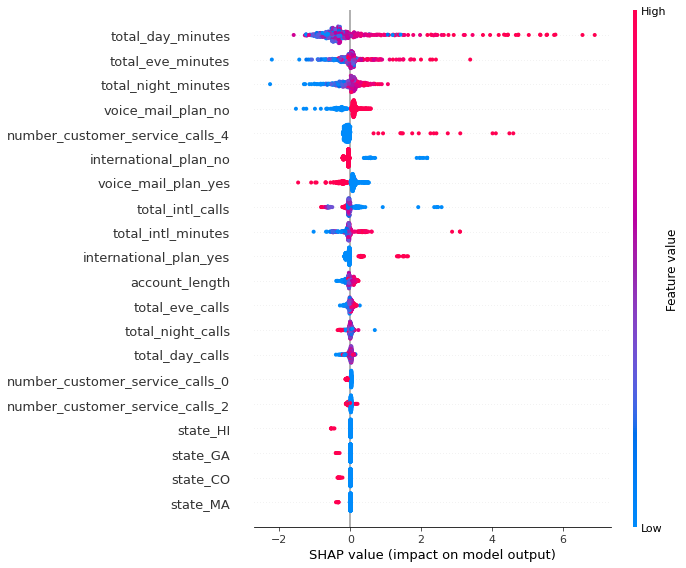

In [31]:
interpret_model(best)

###### Gain and Lift Charts

In [33]:
preds = predict_model(best,probability_threshold=0.5 ,data=test)
y_probas = preds[['Score']]
y_probas["Score2"] = 1 - y_probas["Score"]
y_test = preds[['Label']]
y_test['Label'][y_test.Label == "yes"] = 0
y_test['Label'][y_test.Label == "no"] = 1

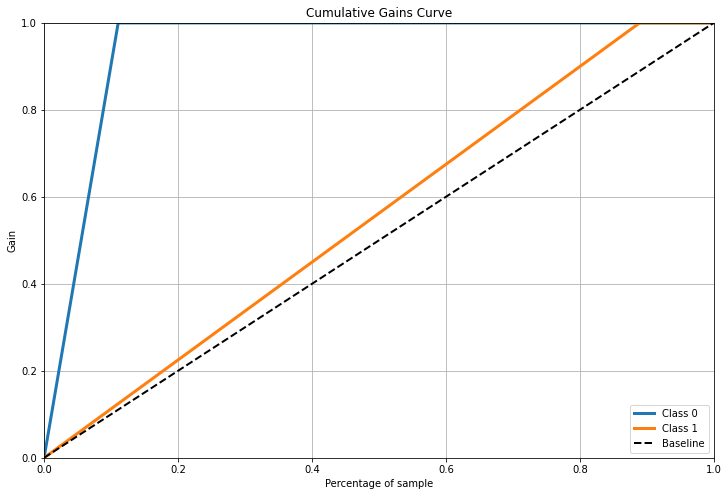

In [34]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_probas,figsize = (12,8))
plt.show()

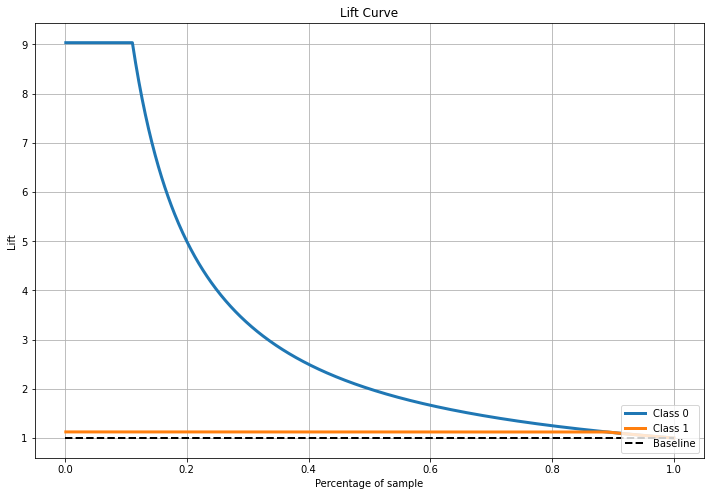

In [35]:
skplt.metrics.plot_lift_curve(y_test, y_probas, figsize = (12,8))
plt.show()

## Finalizing and Saving Model

In [35]:
final = finalize_model(best)
unseen_predictions = predict_model(final,probability_threshold=0.5 ,data=test)
unseen_predictions.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Label,Score
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,no,0.0578
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,no,0.0658
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,26.11,203.0,99,9.14,13.1,6,3.54,4,yes,0.8322
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,18.55,129.6,121,5.83,8.1,3,2.19,3,no,0.0253
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,23.55,250.7,115,11.28,15.5,5,4.19,3,no,0.0271


In [36]:
save_model(final,'model')

Transformation Pipeline and Model Succesfully Saved
